# **My First Notebook of my ML Journey**

### I'll be trying many different machine learning algorithms to compare which method works the best. 

### The first RandomForest Method is directly from the tutorial, which can be found [here](https://www.kaggle.com/code/alexisbcook/titanic-tutorial).

## **Import Necessary Libraries and Read Data:**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import torch
import tensorflow as tf
import os
# Lists all data available:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_data = pd.read_csv("/kaggle/input/titanic/test.csv")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Take a look at the training data:
train_data.head(n = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
from sklearn.ensemble import RandomForestClassifier

# y is the outcome
y = train_data["Survived"]

# Extract only desired features
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# define model and fit and predict:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

# **Exploratory Data Analysis and Feature Engineering**
### Now, this was without any exploratory data analysis (EDA) and feature engineering. We'll try to explore the data and perform some feature engineering as well. This is the [source](https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial/notebook) that I will use for this. Also, I've done my own EDA and feature engineering according to Kaggle's tutorials, which can be found here in Kaggle's [Intermediate Machine Learning Tutorial](https://www.kaggle.com/learn/intermediate-machine-learning) and [Feature Engineering](https://www.kaggle.com/learn/feature-engineering)

In [4]:
# Take a look at the info of the data:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### We can see that Cabin has a lot of null objects, so we'll have to see if it's worth using this. Age has 891-714 = 177 null objects, so we'll have to see as well. Embarked only has two missing, we should think of replacing this with something else as well. Let's do some EDA: 

In [5]:
EDA_X = train_data.copy()

# find colname of objects and factorize them:
for colnames in EDA_X.select_dtypes("object"):
    EDA_X[colnames], _ = EDA_X[colnames].factorize()

#First remove survived, and need to remove float to calculaute MI!:
EDA_Y = EDA_X["Survived"]
EDA_X = EDA_X.drop("Survived",axis=1)
EDA_X["Fare"] = EDA_X["Fare"].astype("int")
EDA_X_colnames = EDA_X.columns
print(EDA_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    int64  
 9   Cabin        891 non-null    int64  
 10  Embarked     891 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 76.7 KB
None


In [6]:
# Impute missing values of Age and turn them into int:
from sklearn.impute import SimpleImputer
Simple_Imputer = SimpleImputer(strategy="median")
EDA_X = pd.DataFrame(Simple_Imputer.fit_transform(EDA_X))
EDA_X.columns = EDA_X_colnames
EDA_X = EDA_X.astype("int")
print(EDA_X.info())

my_discrete_features = EDA_X.dtypes
print(my_discrete_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Name         891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Ticket       891 non-null    int64
 8   Fare         891 non-null    int64
 9   Cabin        891 non-null    int64
 10  Embarked     891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB
None
PassengerId    int64
Pclass         int64
Name           int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Ticket         int64
Fare           int64
Cabin          int64
Embarked       int64
dtype: object


In [7]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores (X,y):
    mi_scores = mutual_info_classif(X,y)
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = EDA_X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores= make_mi_scores(EDA_X,EDA_Y)
print(mi_scores)

Sex            0.166475
Fare           0.084712
Ticket         0.083390
Pclass         0.068139
Cabin          0.052963
Age            0.036030
Name           0.015678
PassengerId    0.012873
Embarked       0.009399
SibSp          0.000000
Parch          0.000000
Name: MI Scores, dtype: float64


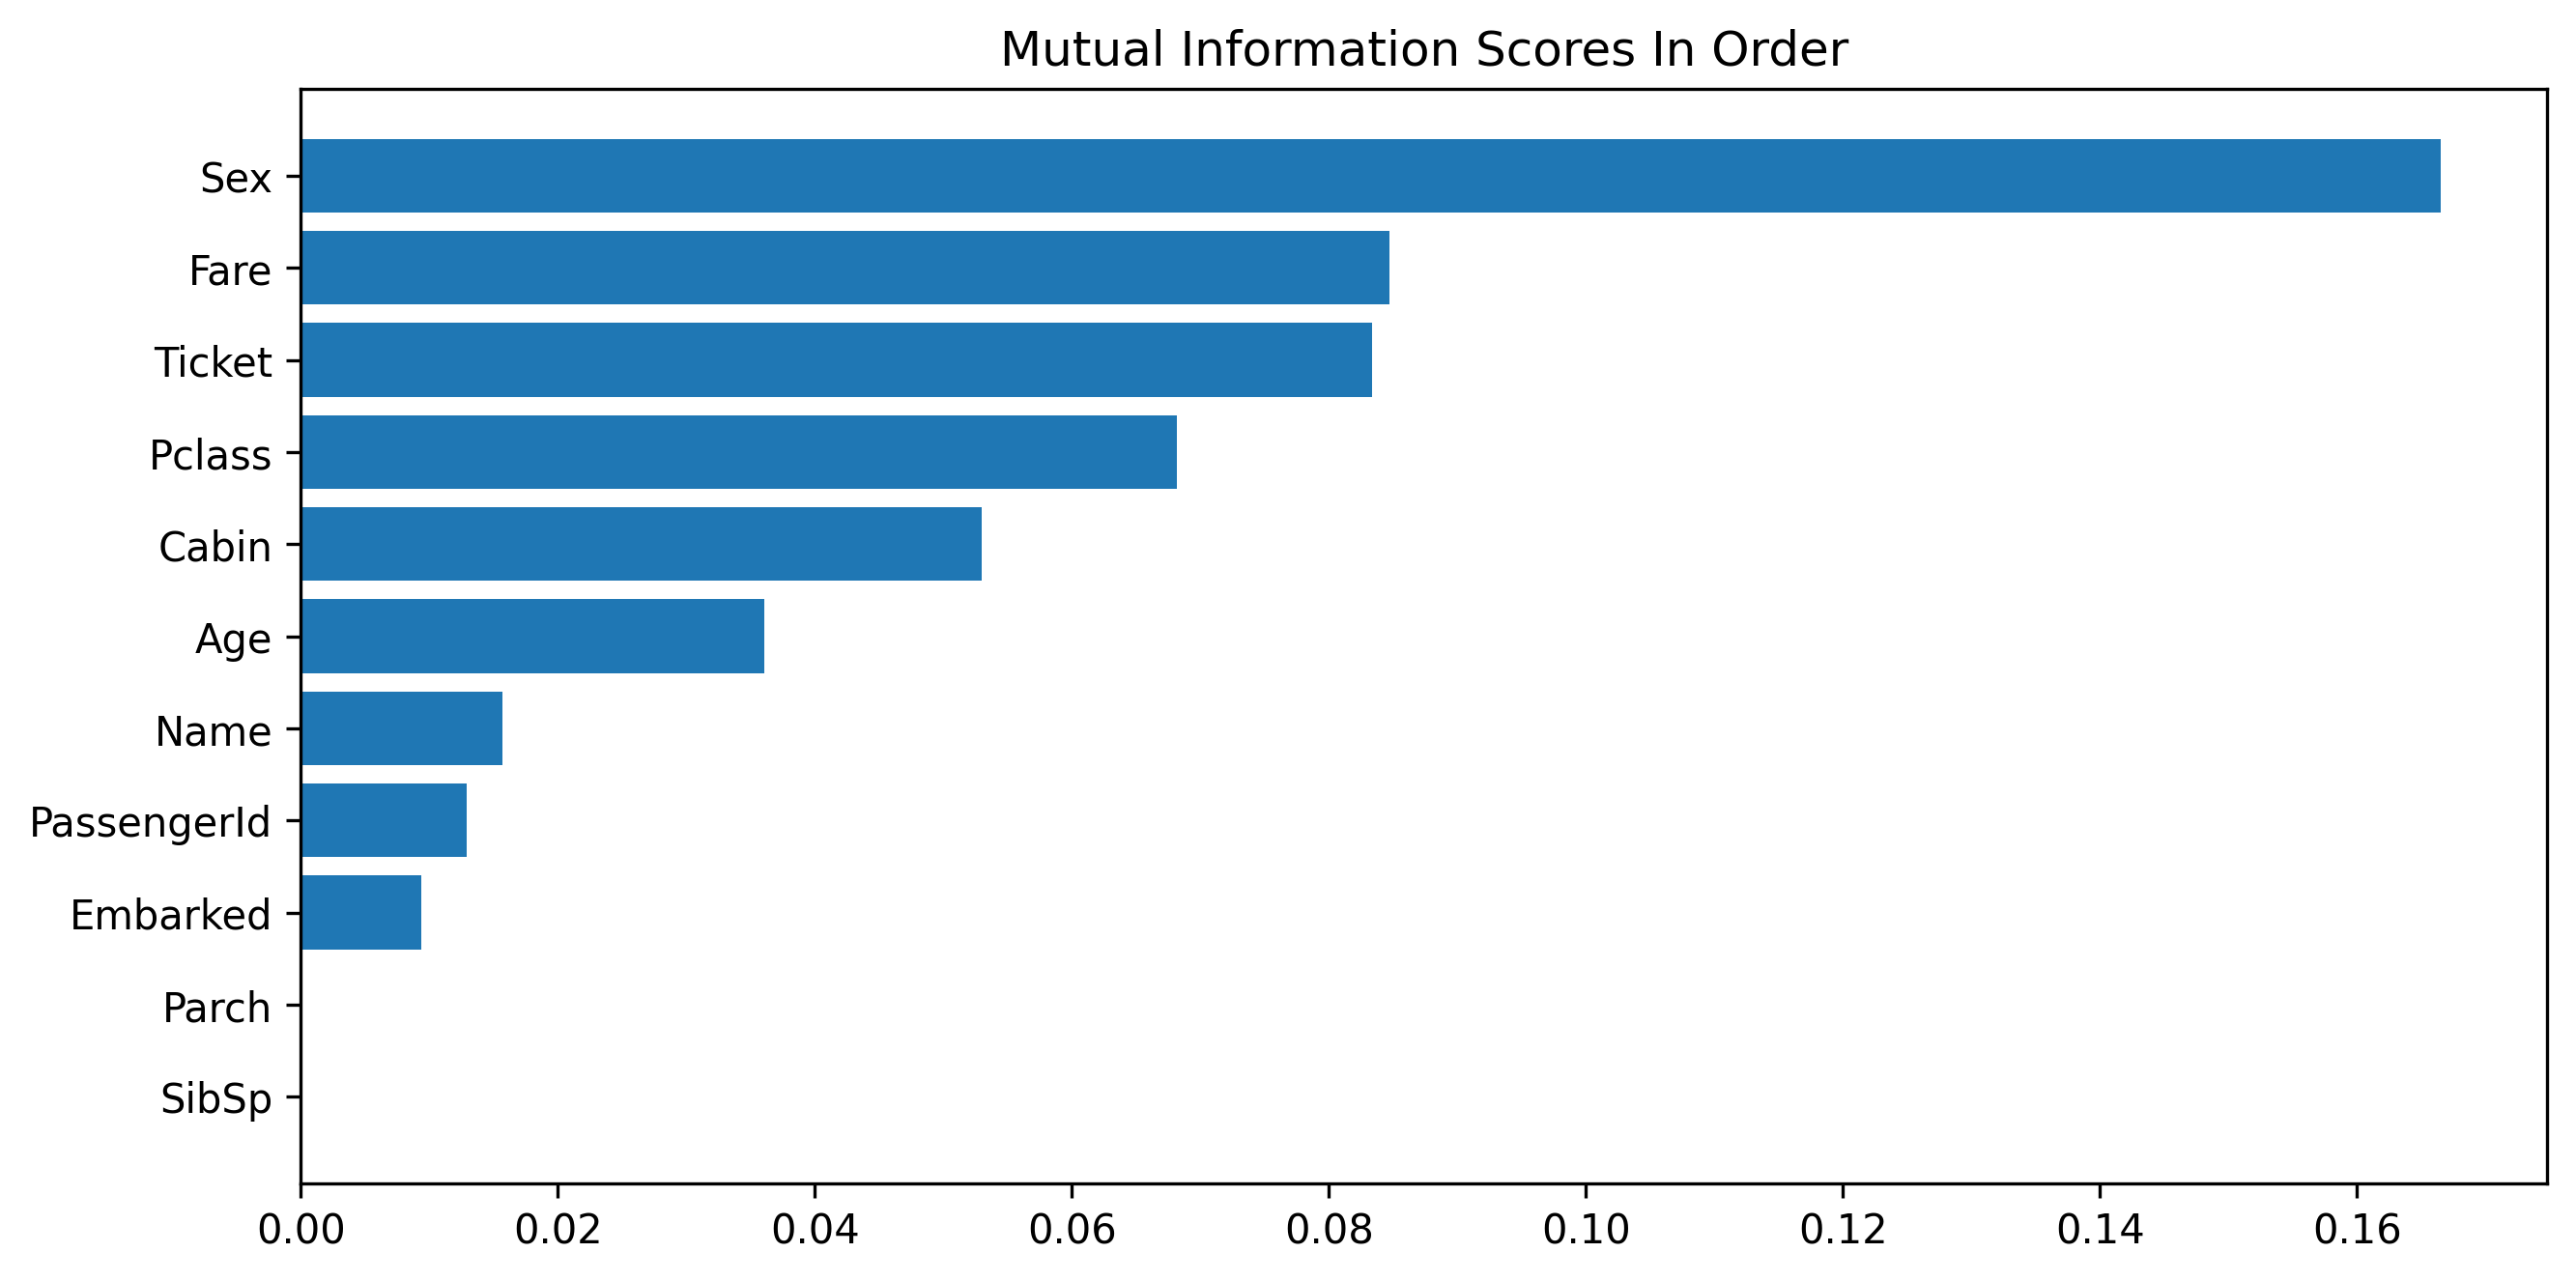

In [8]:
# mi_scores must be a pd.Series
def plot_mi_scores(mi_scores):
    scores = mi_scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores In Order")

plt.figure(dpi=300, figsize=(10, 5))
plot_mi_scores(mi_scores)

### Here we can see that as expected (with previous "information" on data), that sex has the biggest impact on the outcome. However, MI is only univariate, it doesn't mean that low MI score features have no impact on outcome because the score is zero. MI doesn't take interactions between features into account at all. Also, note that MI will change by a little bit every time it is run because of the nature of the function, but the overall trend doesn't change. 

### Indeed, a quick check does confirm that sex does play a big role:

% of women who survived: 0.74204
% of men who survived: 0.18891


<AxesSubplot:xlabel='Sex', ylabel='count'>

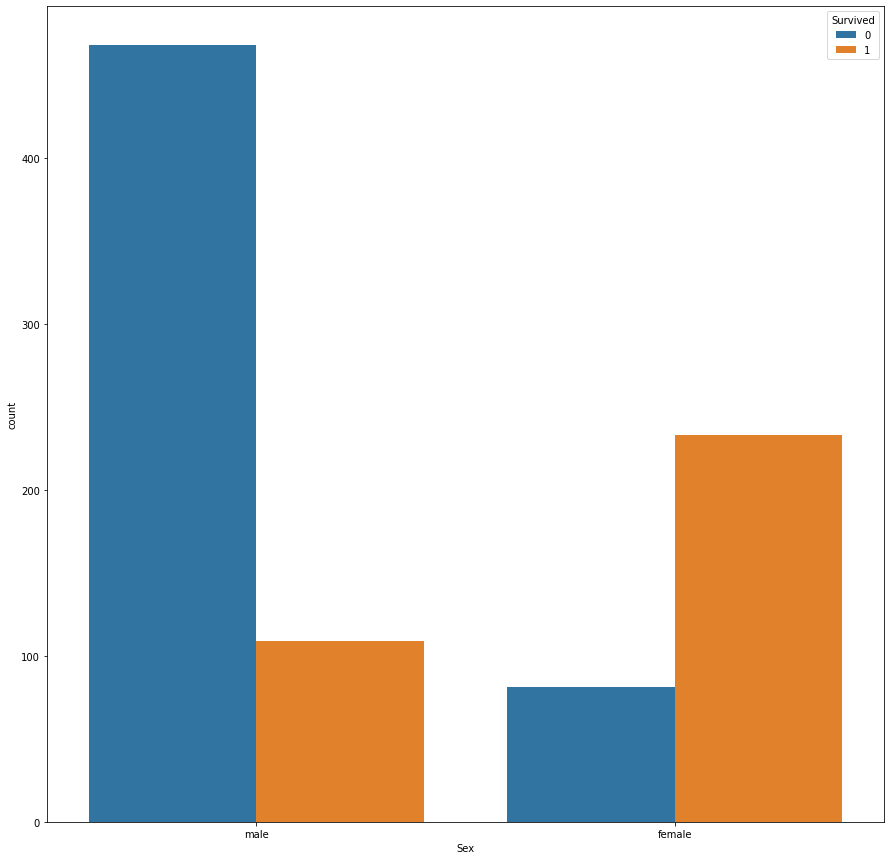

In [9]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = np.sum(women)/len(women)
print(f"% of women who survived: {rate_women:.5f}") 

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = np.sum(men)/len(men)
print(f"% of men who survived: {rate_men:.5f}") 

fig, ax = plt.subplots(nrows = 1, figsize = (15,15))
sns.countplot(x="Sex", hue = "Survived", data = train_data)

### We can also see here that the higher the Fare, the more chance you have for surviving, despite the lower number of sample size:

% of rich people who survived: 0.68125
% of poor people who survived: 0.31918


<AxesSubplot:xlabel='Fare', ylabel='Count'>

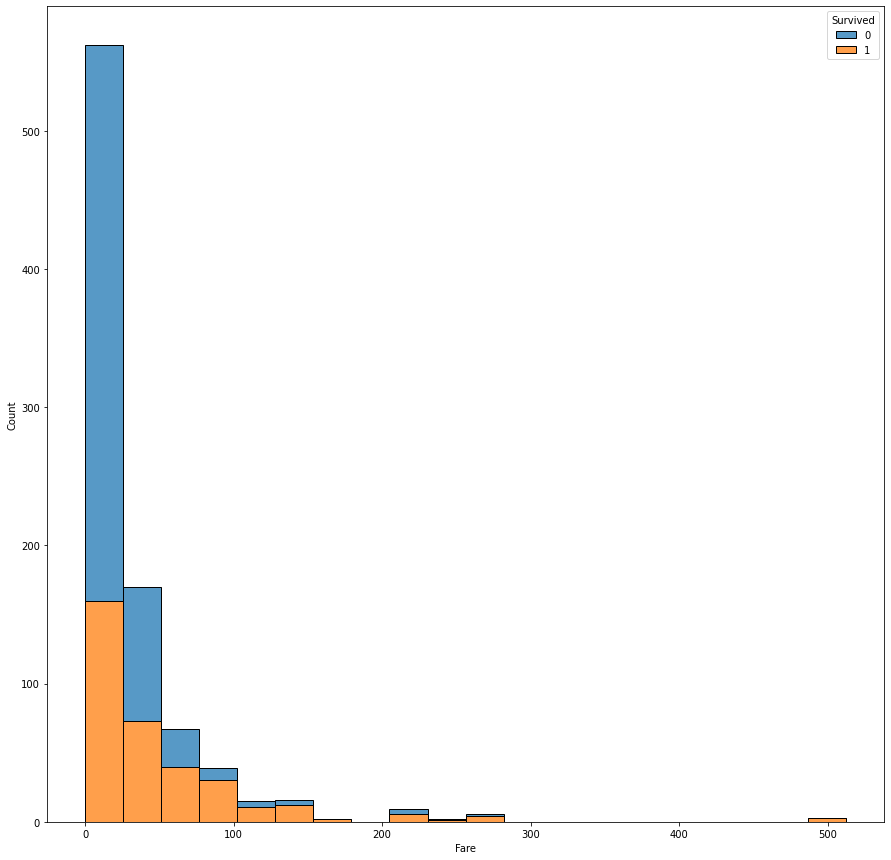

In [10]:
rich = train_data.loc[train_data.Fare > 50]["Survived"]
rate_rich = np.sum(rich)/len(rich)
print(f"% of rich people who survived: {rate_rich:.5f}") 

poor = train_data.loc[train_data.Fare < 50]["Survived"]
rate_poor = np.sum(poor)/len(poor)
print(f"% of poor people who survived: {rate_poor:.5f}") 


fig, ax = plt.subplots(nrows = 1, figsize = (15,15))
sns.histplot(x="Fare", hue = "Survived", data = train_data, bins = 20, multiple = "stack")

In [11]:
# Now find correlation between features (note correlation only finds linear relationship, however.)
EDA_X_corr = EDA_X.drop(["PassengerId","Ticket","Name"],axis=1).corr().abs().unstack(level=0).sort_values(ascending=True).reset_index(drop=False)
EDA_X_corr.columns = ["1st Feature", "2nd Feature","Correlation Coefficient"]
EDA_X_corr.drop(EDA_X_corr.iloc[1::2].index, inplace=True) #remove duplicate pairs, 1::2 removes all even rows
EDA_X_corr = EDA_X_corr.drop(EDA_X_corr[EDA_X_corr["Correlation Coefficient"] == 1.0].index) #remove correlation with itself
EDA_X_corr = EDA_X_corr[EDA_X_corr["Correlation Coefficient"] > 0.5] # >0.4 for "high"

print(EDA_X_corr)

   1st Feature 2nd Feature  Correlation Coefficient
52      Pclass        Fare                 0.550553
54      Pclass       Cabin                 0.623554


### Since there are a lot of features, draw a Heatmap to visualize the interactions between features:

<AxesSubplot:>

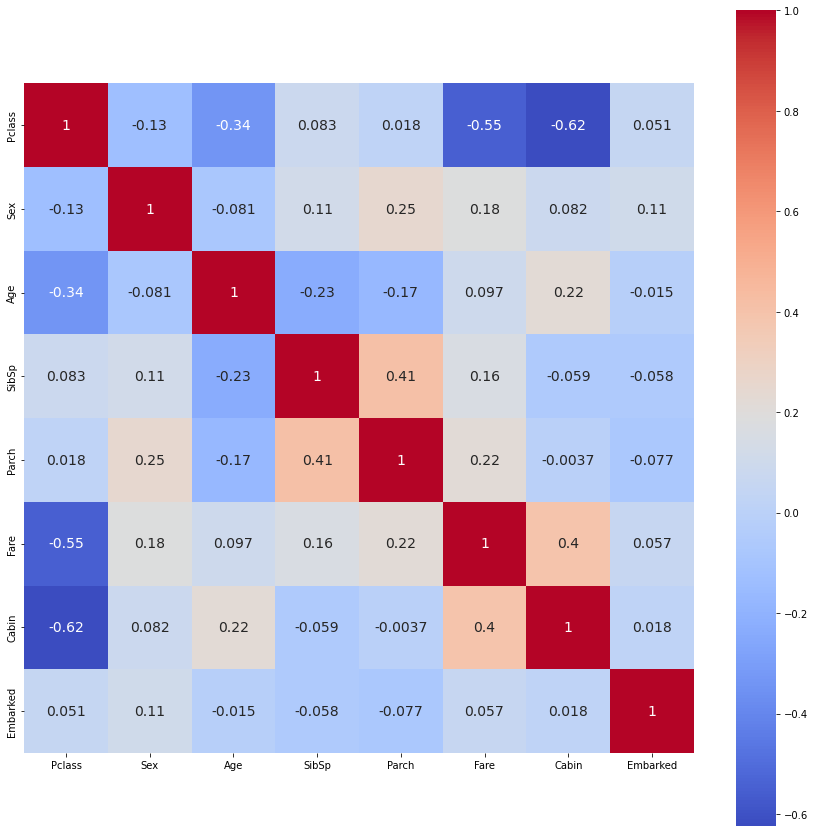

In [12]:
fig, ax = plt.subplots(nrows = 1,figsize = (15,15))
sns.heatmap(EDA_X.drop(['PassengerId',"Ticket","Name"], axis=1).corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

### We can confirm that Pclass and Cabin are highly correlated. But, we know that Cabin originally had a lot of missing information– so we cannot discard Cabin completely, since it will impact our performance. We must fill Cabin in with a reasonable value (we temporarily label encoded it with .factorize()) and maybe think of an engineered feature that utilizies the highly correlated Cabin and PClass. 

In [13]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### It turns out that the first letter of the Cabin refers to the deck of the ship. Let's engineer a feature called "Deck" from Cabin- most of the missing data will have the letter "M". We can first see the distribution within Deck and PClass by grouping them and counting them: 

In [14]:
my_train_data = train_data.copy() # Don't modify train_data
my_train_data["Deck"] = my_train_data["Cabin"].apply(lambda x: x[0] if pd.notnull(x) else "M")
my_train_data.Deck.unique()

df_decks = my_train_data.groupby(["Deck","Pclass"]).count().drop(columns=["PassengerId","Survived","Name","Ticket","Age","SibSp","Parch","Fare","Cabin","Embarked"])
df_decks.columns = (["Count"])
df_decks = df_decks.transpose()
df_decks

Deck     A   B   C   D      E        F     G   M            T
Pclass   1   1   1   1  2   1  2  3  2  3  3   1    2    3  1
Count   15  47  59  29  4  25  4  3  8  5  4  40  168  479  1

For different models- Try XGBoost, then Deep Learning Model with TF and PyTorch!